# Lecture: Single-photon Interference

Authors: Amélie Orban (Editor), Inga Schöyen, Alessandro Delmonte, Alexander Rihane. 
<br> Based on the project <em>Simulating Single Photon Interference using QuTiP (Quantum Toolbox in Python)</em> carried out in June 2021 at Maastricht University, Maastricht Science Programme.
<br> Last updated: 09/11/21.

In [1]:
import matplotlib.pyplot as plt
import qutip
from IPython.display import Image
from numpy import cos, exp, pi, random, sin, sqrt
from qutip import Qobj, basis

%matplotlib inline

### Table of Contents
* [Introduction](#section0)
* [1. Theoretical Background](#section1)
* [2. Coding the constitutive elements](#section2)
* [3. Simulation of Single-Photon Interference Experiment](#section3)
* [4. Variations of Single-Photon Interference Experiment](#section4)
* [Conclusion and Takeaways](#section5)

### Introduction <a class="anchor" id="section0"></a>

Wave-particle duality is one of the key concepts of quantum mechanics and it illustrates the fact that every quantum particle or object can be described using both particle and wave properties. Neither of these classical concepts can fully describe quantum objects on its own.

In a similar manner to Thomas Young's double-slit experiment, originally carried out in 1801, the wave-particle duality of light can be observed by performing a single-photon interference experiment, or in this case, simulation. The individual *particle*-like photons interfere with themselves, which is an intrinsically *wave*-like property, thus exhibiting both particle and wave characteristics at the same time.

This lecture investigates the phenomenon of single-photon interference by creating a simulation of a quantum optical experiment in which single photons go through a polarisation interferometer.
* As mentionned, the experiment to be simulated is similar to Young‘s, in that it also produces interference by allowing a photon to take two separate paths. In a classical sense, a beam of light is split into two separate waves, one of which will travel a different path length, to then be recombined into a single wave by using beam splitters and a polarization analyzer.
* Varying the path lengths results in a phase shift, which creates an interference pattern.
* Applying this classical understanding to the case under study, a single photon, which is an indivisible packet of light, would have to be ‘split’ into two ‘waves’ for an interference pattern to occur. Because the photons are sent through the path individually and cannot be split any further, it seems that they cannot interfere with each other. 
* But they do interfere! The canonical understanding of the single-photon interference is that the photon’s probability wave interferes with itself, in opposition to interference happening between two distinct states.

### 1. Theoretical Background <a class="anchor" id="section1"></a>

This section presents the setup of the single-photon interference experiment from a theoretical perspective, and details the different optical elements that must be simulated. The mathematical expression of each element will also be presented, in the form of Jones matrices acting as operators on the given quantum state.

The setup and corresponding theory of this single photon interference experiment closely follows the work of Mark Beck in "Quantum Mechanics, Theory and Experiment" (*Beck, M. (2012). Quantum mechanics, theory and experiment. Oxford University Press.*), more specifically Experiment 6 of Section 3.

#### Half-wave plate $\frac{\lambda}{2}$

A wave plate is used to modify the polarization of a wave, using the fact that its effective index of refraction depends on the polarization of the incident wave.
* A wave plate has two orthogonal axes. The fast axis represents the direction with the lower index of refraction as light polarized along that direction propagates faster, and the slow axis, orthogonal to the fast axis, represents the direction with the higher index of refraction.
* This difference in indices of refraction leads to the orthogonal components of the wave (polarization of a wave can always be decomposed into orthogonal components) acquiring different phase shifts when propagating through the material, resulting in an overall relative phase shift between the two components.
* A wave plate makes use of this relative phase shift between the components of the wave to modify its overall polarization.

In this case, a half-wave plate is used, for which the relative phase shift between the fast and slow axes corresponds to a half wavelength shift.
* The fast axis of the half-wave plate is positioned in order to create a $45^\circ$ angle with the horizontal plane. 
* Half of the incident wave is thus polarized along the fast axis and result in a $|+45\rangle$ polarization state, while the other half is polarized along the slow axis into a $|-45\rangle$ state, with a relative phase shift of $\pi$.
* The purpose of a half-wave plate is to rotate the linear polarization of some wave by an arbitrary angle (wave does *not* get split into its orthogonal components), depending on the orientation of the wave plate. 

The mathematical expression of a half-wave plate at $45^\circ$ is the following:

\begin{equation}
J_{\lambda/2 \hspace{1mm} 45^\circ} = \left[\begin{array}{cc} \cos(2\cdot45) & \sin(2\cdot45)  \\ \sin(2\cdot45) & -\cos(2\cdot45) \end{array}\right] = \left[\begin{array}{cc} 0 & 1  \\ 1 & 0 \end{array}\right]
\end{equation}

#### Polarization analyzers PA$_{HV}$ and PA$_{45}$

A polarization analyzer, also called beam displacing polarizer or polarizing beam splitter, has the property that it can both *split* a beam into two orthogonal components, and *displace* each of these components differently. 
* A general wave composed of orthogonal polarization components gets split into two waves travelling in different directions. When the faces of the polarization analyzer are parallel, the outgoing waves will emerge parallel, with a displacement separating them.

If the polarization analyzer is positioned perpendicular to the horizontal plane, in such a way that waves propagating horizontally are normally incident, the general waves get split into vertical and horizontal components and it is referred to as a PA$_{HV}$. 
* In this case, the $|V\rangle$ polarization state gets transmitted without bending, while the $|H\rangle$ gets bent when entering and leaving the PA$_{HV}$ such as to emerge parallel to $|V\rangle$, but displaced and phase-shifted. 
* This polarization analyzer can also be used to recombine orthogonal components of a beam. The process simply gets reversed. 
* The Jones matrix representing a PA$_{HV}$ is composed of three other Jones matrices: the horizontal polarizer, vertical polarizer and phase-shifting matrices. This combination is made such that it represents the splitting and the phase-shifting caused by this element, and is as follows: 

\begin{equation}
J_{PA_{HV}} = J_{V} + J_{\phi}J_{H} = \left[\begin{array}{cc} 0 & 0  \\ 0 & 1 \end{array}\right] + \left[\begin{array}{cc} e^{i \phi} & 0  \\ 0 & 1 \end{array}\right]\left[\begin{array}{cc} 1 & 0  \\ 0 & 0 \end{array}\right] = \left[\begin{array}{cc} e^{i \phi} & 0  \\ 0 & 1 \end{array}\right]
\end{equation}

If one were to rotate a PA$_{HV}$ by $45^\circ$, a general wave incident on such a polarization analyzer would be analyzed into $|+45\rangle$ and $|-45\rangle$ polarization components, making it a PA$_{45}$. 
* In this case, the $|+45\rangle$ polarization state gets transmitted without bending, while the $|-45\rangle$ gets bent when entering and leaving the PA$_{45}$ such as to emerge displaced and parallel to $|+45\rangle$. 
* The Jones matrix for PA$_{45}$ is also a combination of other matrices: the linear polarizer with transmission axis at $45^\circ$, linear polarizer with transmission axis at $-45^\circ$ and phase-shifting matrices. The mathematical expression is thus: 

\begin{equation}
\begin{split}
J_{PA_{45}} &= J_{+45} + J_{\phi}J_{-45} \\
&= \left[\begin{array}{cc} \cos^2(45) & \cos(45)\sin(45)  \\ \cos(45)\sin(45) & \sin^2(45) \end{array}\right]
+ \left[\begin{array}{cc} e^{i \phi} & 0  \\ 0 & 1 \end{array}\right]\left[\begin{array}{cc} \cos^2(-45) & \cos(-45)\sin(-45)  \\ \cos(-45)\sin(-45) & \sin^2(-45) \end{array}\right] \\
&= \left[\begin{array}{cc} \frac{1}{2}(e^{i \phi} +1) & \frac{1}{2}(1-e^{i \phi})  \\ 0 & 1 \end{array}\right]
\end{split}
\end{equation}

#### Complete Setup

The setup of the experiment, represented in the figure below, is as follows.
* A photon is prepared in the $|+45\rangle$ state and is sent through an interferometer, composed of a PA$_{HV}$, a half-wave plate, another PA$_{HV}$, and finally a PA$_{45}$.
* The first polarization analyzer PA$_{HV}$ is used to split the incident photon into two orthogonal polarization components $|H\rangle$ and $|V\rangle$, and displace them accordingly.
* Each of the components emerges parallel to the other and then goes through the half-wave plate. Inserting the half-wave plate in the polarization interferometer allows for the equalization of the path lengths of the two arms.
* As already mentioned, a half-wave plate with its fast axis rotated to $45^\circ$ causes half of the incident wave to be polarized into a $|+45\rangle$ state (fast axis) and the other half into a $|-45\rangle$ state (slow axis), with a phase shift of $\pi$. In this specific setup, this implies that the polarization of the two components gets "switched" from $|H\rangle$ to $|V\rangle$ and vice-versa as the linear polarizations are rotated by $90^\circ$, making the overall behaviour of the two arms symmetric with equalized path lengths and no relative phase shift (for now).
* The second polarization analyzer PA$_{HV}$ is then used to recombine the components.
* Finally, the use of a PA$_{45}$ at the end of the interferometer allows for the splitting of the final photon into $|+45\rangle$ and $|-45\rangle$ polarization states, providing two different paths and two different ports for the output. In this way, it is easy to measure how the intensity of each of the outputs gets modulated.

This apparatus acts as an interferometer, and the final super-positioned states should interfere producing an interference pattern and output intensities that depend on the relative phase between them (equivalently, on the path length difference).
* This relative phase (initially zero) can be modified using the PA$_{HV}$'s.
* One (or both) of the two polarization analyzers can be tilted in order to vary the relative phase between the two arms, as the relative phase shift is proportional to the tilt angle of the PA$_{HV}$ (because it modifies the path lengths).
* When the phase is $\phi = 0$, there should be constructive interference, with all of the output coming from the $+45^\circ$ port, while when the phase is $\phi = \pi$, there should be destructive interference, with all of the output coming from the $-45^\circ$ port.
* Note that this interference is visible because of the last element, the PA$_{45}$, as it projects the two, initially orthogonal (no possibility of displaying interference), polarization states onto the $+45^\circ$ and $-45^\circ$ axes where they do interfere.


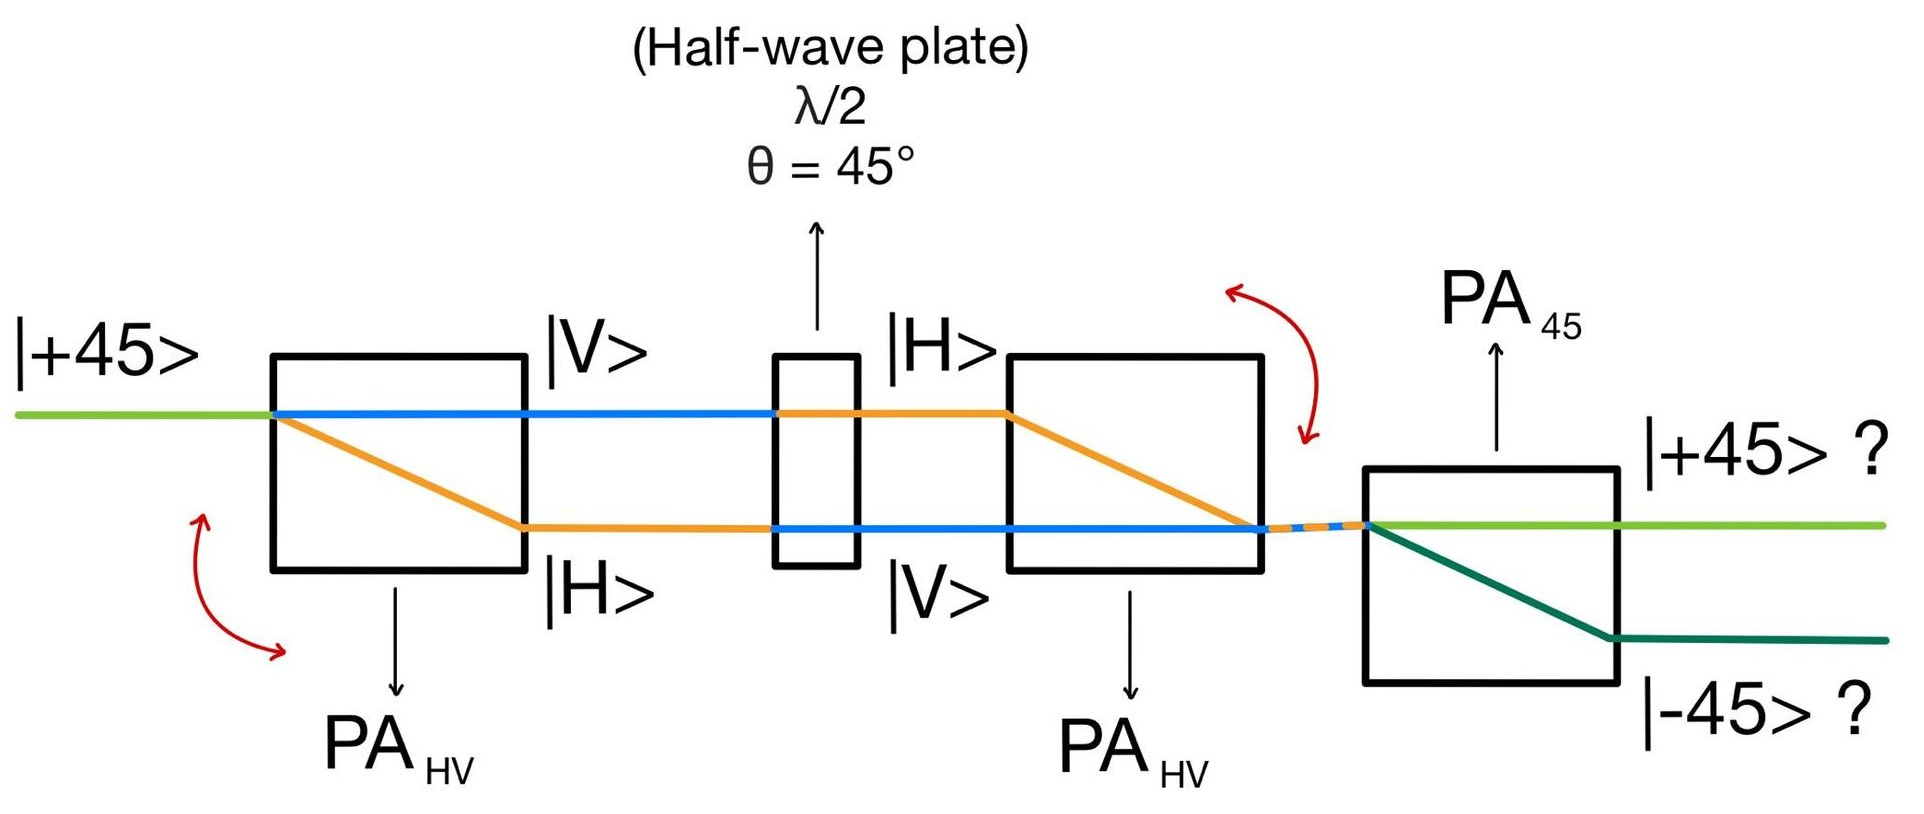

In [2]:
Image(filename="images/single-photon-interference-setup.jpg", width=700, embed=True)

Note that a single photon is sent through these optical elements, making the process quantum mechanical in nature. This requires for an important distinction, when it comes to the splitting of the state into orthogonal components.
* A classical wave is split into its orthogonal components deterministically, with the wave actually getting divided into two components, each *in proportion* to the coefficient of the corresponding polarization state in the general polarization ($\psi = c_H |H\rangle + c_V |V\rangle$).
* On the other hand, when it comes to single photons, as they cannot be broken down any further, they are 'split' randomly and it is not possible to determine with certainty which port any photon will emerge from.
* The proportion of the basis states $|H\rangle$ and $|V\rangle$ in a general state $\psi$ describes the *probability* of the photon taking that corresponding path.
* Note also that the state of the photon never actually gets 'split' and it stays as one single state throughout the entire interferometer.

### 2. Coding the constitutive elements <a class="anchor" id="section2"></a>

#### Basis vectors
Code the polarization basis vectors, for the bases $H/V$ and $+/-45$. They can then be used to code any polarization state, since any state can be expressed as a linear combination of basis vectors.

In [3]:
# HV basis

# horizontal polarization
H = basis(2, 0)
# vertical polarization
V = basis(2, 1)

In [4]:
# +45/-45 basis (in terms of HV basis)

# +45 polarization
p45 = 1 / sqrt(2) * (H + V)
# -45 polarization
n45 = 1 / sqrt(2) * (H - V)

#### Polarization analyzer (HV) n°1
It induces a phase shift on the H polarization relative to V polarization, because of the difference in the path lengths of the two arms of the interferometer. 
<br> In the case of a single photon, the state doesn't actually get split  and there is only a single state throughout the apparatus, so the PA$_{HV}$ only affects the phase of the components.

In [5]:
# Polarization analyzer (HV) n°1

phaseshift1 = pi / 4  # CONSTANT
# should depend on real size of the setup (here: arbitrarily chosen)
PA_HV1 = Qobj([[exp(1j * phaseshift1), 0], [0, 1]])
PA_HV1

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.70710678+0.70710678j 0.        +0.j        ]
 [0.        +0.j         1.        +0.j        ]]

#### Half-wave plate $\frac{\lambda}{2}$
In this case, the fast axis makes an angle of $45^\circ$ with the horizontal.
<br> For a single photon, the effect of going through such a half-wave plate is that the $|H\rangle$ and $|V\rangle$ polarization components are switched.

In [6]:
# Half-wave plate

θ = pi / 4  # fast axis orientation
# (!) numpy calculates with rad
halfwave = Qobj([[cos(2 * θ), sin(2 * θ)], [sin(2 * θ), -cos(2 * θ)]])

"""
removes very small elements
(numerical artifacts from the finite precision of the computer)
"""
halfwave.tidyup()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]

#### Polarization analyzer (HV) n°2
As before, it induces a phase shift on the H polarization relative to V polarization.
* Initially, the value of the phase shift induced by PA$_{HV2}$ should be set to the same value as for PA$_{HV1}$. The initial state of our setup has both of the PA$_{HV}$s in the exact same position (both tilted in the same way), with the overall relative phase shift being zero.
* The phase shift induced by PA$_{HV2}$ can then be changed in order to observe different levels of interference.
* A difference in the phase shifts induced by the two polarization analyzers causes the *relative* phase shift between the components to change, and it is this *relative* phase shift that is responsible for the interference.

In [7]:
# Polarization analyzer (HV) n°2

phaseshift2 = pi / 4  # CHANGE TO CHANGE INTERFERENCE
# should depend on real size of the setup
PA_HV2 = Qobj([[exp(1j * phaseshift2), 0], [0, 1]])

PA_HV2

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.70710678+0.70710678j 0.        +0.j        ]
 [0.        +0.j         1.        +0.j        ]]

#### Polarization analyzer (45)
The PA$_{45}$ acts on the photon such that it has to come out as a $|+45\rangle$ polarized photon or as a $|-45\rangle$ polarized photon.
* Based on the coefficients of each polarization basis components constituting the general polarization state, the probability of the photon getting out in that corresponding state can be computed.
* It should also induce a phase shift on $|-45\rangle$ component with respect to $|+45\rangle$ as a result of different path lengths (as seen in the theory section), but this effect is ignored as this is the last optical element, and the goal is to determine whether the final state of the photon is $|-45\rangle$ or $|+45\rangle$, not which one "gets out first".
* The role of this polarization analyzer is to determine the outcome of the experiment.
* The single photon interference happens just before the photon goes through this last polarization analyzer, e.g. when the states are 'recombined' after the second PA$_{HV}$ (this is not to be interpreted too literally because, as previously mentioned, the state of the photon never actually gets split and it stays as one state throughout the apparatus), and thus phase shift does not have an importance anymore.

In [8]:
# Polarization analyzer (45)

# linear Polarizer, transmission axis +45 wrt horizontal
θ = pi / 4
Pp45 = Qobj([[cos(θ) ** 2, cos(θ) * sin(θ)], [cos(θ) * sin(θ), sin(θ) ** 2]])
# linear Polarizer, transmission axis -45 wrt horizontal
θ = -pi / 4
Pn45 = Qobj([[cos(θ) ** 2, cos(θ) * sin(θ)], [cos(θ) * sin(θ), sin(θ) ** 2]])


def PA_45(vector):
    p45_comp = Pp45 * vector  # retrieve only +45 component
    n45_comp = Pn45 * vector  # retrieve only -45 component
    return p45_comp, n45_comp

### 3. Simulation of Single-Photon Interference Experiment <a class="anchor" id="section3"></a>

**Define initial variables:**
* One has to choose the initial minimal and maximal values of the phase shift induced by PA$_{HV2}$, along with the number of steps to be effectuated between these values. These different values will be run through during the simulation and the experiment will be carried out for each of them in order to collect data to determine what the relationship is between the interference and the relative phase shift. The higher the number of steps is, the more precise the final result will be.
* The number of iterations, for one value of the phase shift, also has to be defined. Since the photon getting out of the interferometer in a certain polarization state is governed by probabilities, it is important to carry out the same process numerous times to get a good sample and a good representation of the results.

In [9]:
psi_0 = p45  # define the initial state (+45 vector)

phaseshift2_init = pi / 4  # initial value
phaseshift2_max = 8 * pi
n = 100  # resolution of φ (amount of steps)
step = (
    phaseshift2_max - phaseshift2_init
) / n  # interval divided by number of small steps we want
N_init = 1000  # number of iterations (range(N) -> 0 to N-1, both included)

# create x and y coords arrays to store the values needed to plot output graph
x_coords = []  # relative phase shift
y1_coords = []  # amount of photons in +45
y2_coords = []  # amount of photons in -45

**Create a *for loop* to run through all of the possible values for the phase shift considered for PA$_{HV2}$:**
<br> In this loop, the passage of the photon through the interferometer is simulated using an effective matrix. The PA$_{45}$ is used after that to compute the probability related to each of these polarization states, and eventually to get the results of the experiment.
* 'Output' values are first defined to keep track of the results of the numerous iterations that are performed to measure the final state of the photon for a given phase shift. They are used to count the amount of photons that come out as $|+45\rangle$ and the amount that come out as $|-45\rangle$.
* The phase shift is also defined and directly added to the array of x-coordinates.
* With this phase shift, PA$_{HV2}$ can be defined, which allows for the definition of the final effective matrix. The effective matrix regroups all of the operators acting on the photon (in the correct order) in a single matrix.
* This is then multiplied with the initial state of the photon, to get the final state that will be passed through the PA$_{45}$.
* The $|+45\rangle$ and $|-45\rangle$ components are then retrieved and used to compute the final probabilities. To do so, the norm of the vector of each component is computed and then squared.

Inside the first *for loop* is another loop performing what can be considered as the final measurement. Whether the photon comes out in a $|+45\rangle$ or $|-45\rangle$ polarization state is a random process that depends on the corresponding probabilities.
* To simulate this, a random number is generated between 1 and 100 (100 because $100\%$ of the photons need to come out in either one of the states).
* If the number is smaller or equal to the probability (in percentage form) related to the $|+45\rangle$ component, the photon is measured to have come out in the $|+45\rangle$ state. Otherwise, it is measured in the $|-45\rangle$ state.
* These measurements are then accounted for and stored in the 'output' values that were previously defined.
* When all of the iterations are performed, the output values are added to the arrays corresponding to different y-coordinates (one for $|+45\rangle$ photons and one for $|-45\rangle$ photons).
* They are then reinitialized at the beginning of the first *for loop*, before the entire process starts anew for another value of the phase shift.

In [10]:
for i in range(n + 1):
    output_p45 = 0
    output_n45 = 0

    phaseshift2 = phaseshift2_init + i * step
    x_coords.append(
        (phaseshift2 - phaseshift1) / pi
    )  # add realtive phase shift to x coords
    # create corresponding PA_HV2
    PA_HV2 = Qobj([[exp(1j * phaseshift2), 0], [0, 1]])
    EffM = PA_HV2 * halfwave * PA_HV1  # define the effective matrix

    # apply the effective matrix to the initial state to get the final state
    psi_final = EffM * psi_0

    psi_p45 = PA_45(psi_final)[0]  # retrieve +45 and -45 components
    psi_n45 = PA_45(psi_final)[1]

    # probab is rounded up to 5 decimals to avoid machine precision artifacts
    proba_p45 = round(psi_p45.norm() ** 2, 5)
    proba_n45 = round(psi_n45.norm() ** 2, 5)

    for j in range(N_init):
        """
        generates random number between 1 and 100 (both included),
        100 because 100% of the photons need to come out in either
        +45 or -45 state
        """
        a = random.randint(1, 100)
        if a <= proba_p45 * 100:
            output_p45 = output_p45 + 1
        else:
            output_n45 = output_n45 + 1

    y1_coords.append(output_p45)
    y2_coords.append(output_n45)

**Create output plot:**
<br> Using the arrays (which are collections of coordinates) that are created as the simulation goes on for different values and setups, a plot can be created to visualize the dependency of the interference on the relative phase shift, or similarly, on the different in path lengths of the two arms of the interferometer.

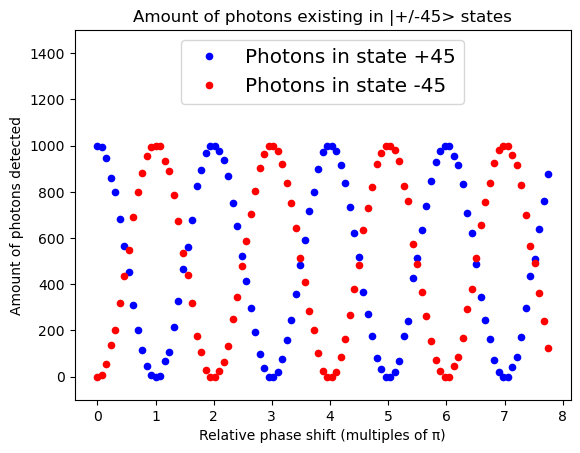

In [11]:
plt.plot(x_coords, y1_coords, "b.", markersize=9, label="Photons in state +45")
plt.plot(x_coords, y2_coords, "r.", markersize=9, label="Photons in state -45")
legend = plt.legend(loc="upper center", fontsize="x-large")
plt.ylim([-100, N_init + 500])
plt.xlabel("Relative phase shift (multiples of π)")
plt.ylabel("Amount of photons detected")
plt.title("Amount of photons existing in |+/-45> states");

The data shows a clear interference pattern. The measurements oscillate between only measuring photons in the state $|+45\rangle$ or $|-45\rangle$ as the relative phase shift increases.

### 4. Variations of Single-Photon Interference Experiment <a class="anchor" id="section4"></a>

Alternative cases can be investigated to get a better understanding of what is happening, why this interference pattern appears, and of the quantum nature of this experiment.

In this case, it is shown that, when the superpositon of states collapses (here the superposition refers to the photon taking both paths "at the same time"), the interference pattern disappears. This is done by blocking either the vertical or the horizontal output port of the very first polarization analyzer, thus preventing the photon to be in the previously mentionned superposition of states as it can take only one path. This comes with some modifications, with respect to how the simulation was implemented previously:
* The main element that has to be modified is the first polarization analyzer. Depending on which port is blocked, the corresponding polarization component as to be put to zero for any further computation. 
* The other big difference with the full interference simulation concerns the amount of photons that goes through the entire interferometer. When the initial $|+45\rangle$ polarized photon goes through PA$_{HV1}$, it has $50\%$ chance of coming out $|V\rangle$ polarized and $50\%$ chance of coming out $|H\rangle$ polarized. Under the assumption that the experiment is carried out enough times to actually get half of the photons to come out from each of the ports, it implies that only half of the photons will get to the other end of the interferometer, as the other half will have been blocked. Where, for the original interference simulation, 1000 photons got out the interferometer, here, only 500 will do so. Because of how it was coded in this simulation, this requires that the number of iterations (for one phase shift value) is halved. This is directly linked to the final probabilities of the photon coming out in state $|+45\rangle$ or $|-45\rangle$. The sum of these probabilities is not 1 anymore (or $100\%$), but 0.5 because half of the photons are not concerned by this. The missing 0.5 is thus the probability that the photon was blocked at the first polarization analyzer.
* The rest of the code is otherwise unchanged.

#### Output port 'V' of the first PA$_{HV}$ is blocked

In [12]:
# Polarization analyzer (HV) n°1, with V output port BLOCKED

phaseshift1 = pi / 4  # CONSTANT
# should depend on real size of the setup (here: arbitrarily chosen)
PA_HV1vb = Qobj([[exp(1j * phaseshift1), 0], [0, 0]])

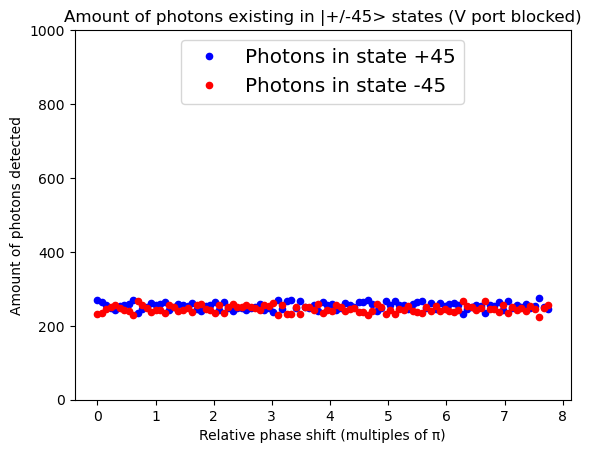

In [13]:
psi_0 = p45  # Defining the initial state (+45 vector)

phaseshift2_init = pi / 4  # initial value
phaseshift2_max = 8 * pi
n = 100  # resolution of φ (amount of steps)
step = (
    phaseshift2_max - phaseshift2_init
) / n  # interval divided by number of small steps we want

# number of iterations (range(N) -> 0 to N-1, both included)
N_init = 1000

x_coords = []  # create x- and y- coords. arrays
# (x = phase shift of 2nd PA_HV,
# y1 = amount of photons in +45,
# y2 = amount of photons in -45)
y1_coords = []
y2_coords = []

for i in range(n + 1):
    output_p45 = 0
    output_n45 = 0

    phaseshift2 = phaseshift2_init + i * step
    # add realtive phase shift to x coords
    x_coords.append((phaseshift2 - phaseshift1) / pi)
    # create corresponding PA_HV2
    PA_HV2 = Qobj([[exp(1j * phaseshift2), 0], [0, 1]])
    EffM = PA_HV2 * halfwave * PA_HV1vb  # Defining the effective matrix

    """
    Applying the effective matrix to the initial state to get the final state
    """
    psi_final = EffM * psi_0
    psi_p45 = PA_45(psi_final)[0]  # Determining the probabilities
    psi_n45 = PA_45(psi_final)[1]
    proba_p45 = round(psi_p45.norm() ** 2, 5)
    proba_n45 = round(psi_n45.norm() ** 2, 5)

    if (proba_p45 + proba_n45) == 1:
        N = N_init  # all of the photons get to the end
    else:
        """
        half of the photons are blocked (should only get N/2 in the ouput)
        -> total prob should be 0.5
        """
        N = int(N_init / 2)

    for j in range(N):
        """
        generates random number between 1 and 50 (both included),
        50 because 50% of the photons need to come out in either
        +45 or -45 state (since other 50% was blocked)
        """
        a = random.randint(1, 50)
        if a <= proba_p45 * 100:
            output_p45 = output_p45 + 1
        else:
            output_n45 = output_n45 + 1

    y1_coords.append(output_p45)
    y2_coords.append(output_n45)

plt.plot(x_coords, y1_coords, "b.", markersize=9, label="Photons in state +45")
plt.plot(x_coords, y2_coords, "r.", markersize=9, label="Photons in state -45")
legend = plt.legend(loc="upper center", fontsize="x-large")
plt.ylim([0, 1000])
plt.xlabel("Relative phase shift (multiples of π)")
plt.ylabel("Amount of photons detected")
plt.title("Amount of photons existing in |+/-45> states (V port blocked)");

#### Output port 'H' of the first PA$_{HV}$ is blocked

In [14]:
# Polarization analyzer (HV) n°1, with H output port BLOCKED

PA_HV1hb = Qobj([[0, 0], [0, 1]])

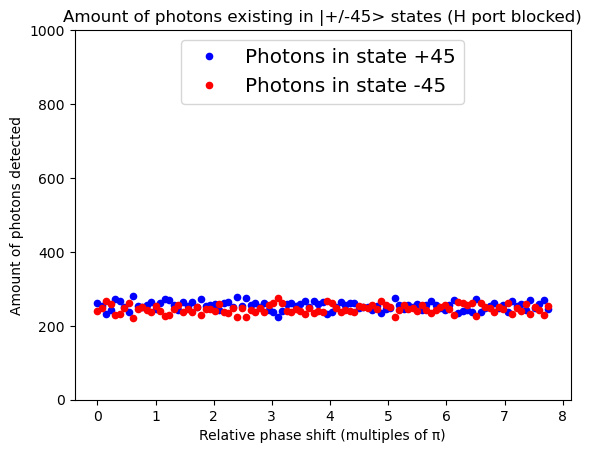

In [15]:
psi_0 = p45  # Defining the initial state (+45 vector)

phaseshift2_init = pi / 4  # initial value
phaseshift2_max = 8 * pi
n = 100  # resolution of φ (amount of steps)
step = (
    phaseshift2_max - phaseshift2_init
) / n  # interval divided by number of small steps we want

# number of iterations (range(N) -> 0 to N-1, both included)
N_init = 1000

"""
create x- and y- coords. arrays (x = phase shift of 2nd PA_HV,
y1 = amount of photons in +45, y2 = amount of photons in -45)
"""
x_coords = []
y1_coords = []
y2_coords = []

for i in range(n + 1):
    output_p45 = 0
    output_n45 = 0

    phaseshift2 = phaseshift2_init + i * step
    # add realtive phase shift to x coords
    x_coords.append((phaseshift2 - phaseshift1) / pi)
    # create corresponding PA_HV2
    PA_HV2 = Qobj([[exp(1j * phaseshift2), 0], [0, 1]])
    # Defining the effective matrix
    EffM = PA_HV2 * halfwave * PA_HV1vb

    """
     Applying the effective matrix to the initial state to get the final state
    """
    psi_final = EffM * psi_0
    psi_p45 = PA_45(psi_final)[0]  # Determining the probabilities
    psi_n45 = PA_45(psi_final)[1]
    proba_p45 = round(psi_p45.norm() ** 2, 5)
    proba_n45 = round(psi_n45.norm() ** 2, 5)

    if (proba_p45 + proba_n45) == 1:
        N = N_init  # all of the photons get to the end
    else:
        """
        half of the photons are blocked (should only get N/2 in the ouput)
        -> total probability should be 0.5
        """
        N = int(N_init / 2)
    """
    # generates random number between 1 and 50 (both included),
    50 because 50% of the photons need to come out in either
    +45 or -45 state (since other 50% was blocked)
    """
    for j in range(N):
        a = random.randint(1, 50)
        if a <= proba_p45 * 100:
            output_p45 = output_p45 + 1
        else:
            output_n45 = output_n45 + 1

    y1_coords.append(output_p45)
    y2_coords.append(output_n45)

plt.plot(x_coords, y1_coords, "b.", markersize=9, label="Photons in state +45")
plt.plot(x_coords, y2_coords, "r.", markersize=9, label="Photons in state -45")
legend = plt.legend(loc="upper center", fontsize="x-large")
plt.ylim([0, 1000])
plt.xlabel("Relative phase shift (multiples of π)")
plt.ylabel("Amount of photons detected")
plt.title("Amount of photons existing in |+/-45> states (H port blocked)");

### Conclusion and Takeaways <a class="anchor" id="section5"></a>

The results show that, when both pathways are unobstructed, an interference pattern emerges. As the relative phase varies, the detected photons oscillate between the $|+45\rangle$ and $|-45\rangle$ states, clearly displaying interference. Note that, while inside the interferometer, the beams are in orthogonal polarizations, so no interference should occur there, though the components get affected and phase-shifted differently. Interference "happens", or rather becomes visible, at the  PA$_{45}$ where both the horizontal and vertical  polarisation are projected onto $+45^\circ$ and $-45^\circ$ axes. The degree of interference oscillates with increasing phase difference between the two paths.

When one of the output port from the first polarization analyzer is blocked, the amount of photons detected is constant (apart from some random fluctuations) under a changing relative phase shift and there is no interference pattern. The results are identical for both setups, with the V beam and the H beam blocked. This illustrates that when the superposition collapses, no interference is displayed.

**Important takeaways:**
* This experiment demonstrates that photons can behave as particles and waves at the same time. This illustrates that the wave-particle duality is not an either-or concept, and that the transition is fluid.
* *So, which path did the photon take before being 'reunited' with its other half?* It was mentioned that the photon never actually gets split nor reunited and remains in one (evolving) state throughout. However, the interference pattern is a function of phase length variance between the two arms of the interferometer, and thus a function of both paths. Hence there is no way to describe the measured interference other than by considering that the photon travels through both paths at the same time. This is done by considering the *wavefunction* of the photon. Its wavefunction is in a superposition of travelling down both paths simultaneously, and will remain in this state until it collapses due to a measurement or an other external factor that causes quantum decoherence. This superposition results in the observed interference pattern.
* By blocking one of the beam’s paths, the photon is prevented from being in superposition and therefore can't interfere with itself. It further results in only half the amount of photons exiting the interferometer. This is due to the photons originally having a 50/50 chance of passing through either path. We still observe photons in both polarization states with a 50/50 distribution, demonstrating that a quantum state can collapse from one superposition and still remain in another superposition at the same time. While the obstruction of one path permanently determines which path the photons are taking (thus collapsing the superposition that allowed for the interference), their polarisation is still in a superposition of two basis states afterwards.
* The simulation shows that single-particle quantum interference can be described  using an *event-by-event* basis. The use of frameworks such as wave fields or time-dependent system evolutions is not necessary to demonstrate the basic workings of the physical mechanism. This is possible, as the mathematical essence of single photon interference can be described with simple vector and matrix functions. However, when intending to use the simulation to make actual predictions about physical mechanisms, it is important to take into account physical limitations to ensure the results of the simulation are meaningful. One example of such a limitation is coherence length, which puts a real limit on the relative phase differences that would still result in interference.

In [16]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Simon Cross, Asier Galicia, Paul Menczel, and Patrick Hopf.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.3.0.dev0+6e4b53d
Numpy Version:      2.3.5
Scipy Version:      1.16.3
Cython Version:     3.2.2
Matplotlib Version: 3.10.8
Python Version:     3.12.0
Number of CPUs:     4
BLAS Info:          blas
INTEL MKL Ext:      None
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip

Installed QuTiP family packages
-------------------------------

qutip-qtrl: 

qutip-jax: 0.1.1.dev6
qutip-qip: 0.5.0.dev0+81a92b9

Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`
